In [87]:
import ROOT
from pyroot_cms_scripts import CMS_style, CMS_text

In [88]:
mc_hist_filename = "hists/dy_amcatnlo_20_mc_2017full.root"
data_hist_filename = "hists/double_muon_data_2017full.root"
variable = "Z_mass"
units = "GeV"
title_x = "m_{Z}"
title_y = ""
show_bw = True
axis_max_digits = 4
leg_pos = [0.75, 0.75, 0.95, 0.9]
leg_text_size = 0.05

draw_with_ratio = True
lower_graph_max_y = 1.5
lower_graph_min_y = 1.1

plot_mc_data = """
if units != "":
    title_x = f"{title_x} ({units})"

if title_y == "":
    title_y = "Events"

ROOT.TGaxis().SetMaxDigits(axis_max_digits)
CMS_style.cd()
ROOT.gROOT.ForceStyle()

mc_hist_file = ROOT.TFile.Open(mc_hist_filename)
data_hist_file = ROOT.TFile.Open(data_hist_filename)

legend = ROOT.TLegend(leg_pos[0], leg_pos[1], leg_pos[2], leg_pos[3])
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextFont(42)
legend.SetTextSize(leg_text_size)

h_data = data_hist_file.Get(f"data_{variable}")
h_mc = mc_hist_file.Get(f"mc_{variable}")

h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
legend.AddEntry(h_data, "Data", "pe")

h_mc.SetLineColor(ROOT.kBlue + 1)
legend.AddEntry(h_mc, "MC (All)", "f")

bw = h_data.GetBinWidth(1)

if show_bw:
    title_y = f"{title_y} / {bw} {units}"

h_data.SetTitle(f";{title_x};{title_y}")
h_mc.SetTitle(f";{title_x};{title_y}")

maxY = max(h_data.GetMaximum(), h_mc.GetMaximum())
minY = min(h_data.GetMinimum(), h_mc.GetMinimum())
    
if minY == 0.0:
    minY = 0.01

h_mc.SetMaximum(maxY * 1.15)
h_data.SetMaximum(maxY * 1.15)

diff = h_data.Integral() / h_mc.Integral()

h_mc.SetStats(0)
h_data.SetStats(0)

# ------------------
canvas = ROOT.TCanvas()

if not draw_with_ratio:
    h_mc.Draw("hist")
    h_data.Draw("x0 e1 same")
    
    legend.Draw()

if draw_with_ratio:
    
    left_margin = canvas.GetLeftMargin()
    right_margin = canvas.GetRightMargin()
    
    ratio = ROOT.TRatioPlot(h_data, h_mc)
    
    ratio.SetH1DrawOpt("x0 e1")
    ratio.SetH2DrawOpt("hist")
    ratio.SetGraphDrawOpt("PZ")
    
    ratio.SetSeparationMargin(0.0)
    ratio.SetLeftMargin(canvas.GetLeftMargin())
    ratio.SetRightMargin(canvas.GetRightMargin())
    ratio.SetUpTopMargin(0.075)
    ratio.SetLowBottomMargin(0.40)
    
    ratio.Draw("grid hideup")
    
    graph_ref = ratio.GetLowerRefGraph()
    graph_ref.SetMarkerStyle(7)
    graph_ref.SetMaximum(lower_graph_max_y)
    graph_ref.SetMinimum(lower_graph_min_y)
    
    ratio.GetLowYaxis().SetNdivisions(502)
    
    upper_pad = ratio.GetUpperPad()
    upper_pad.cd()
    
    legend.Draw()
    
canvas.Draw()
canvas.SaveAs(f"{variable}.pdf")
"""

Info in <TCanvas::Print>: pdf file Z_mass.pdf has been created


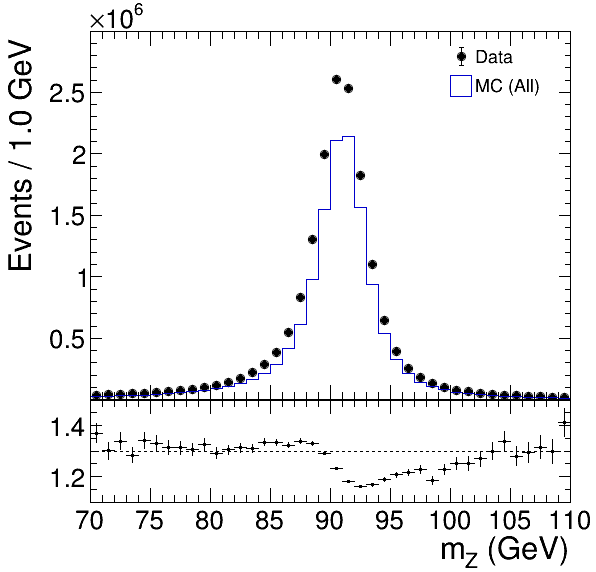

In [89]:
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file lept_pt1.pdf has been created


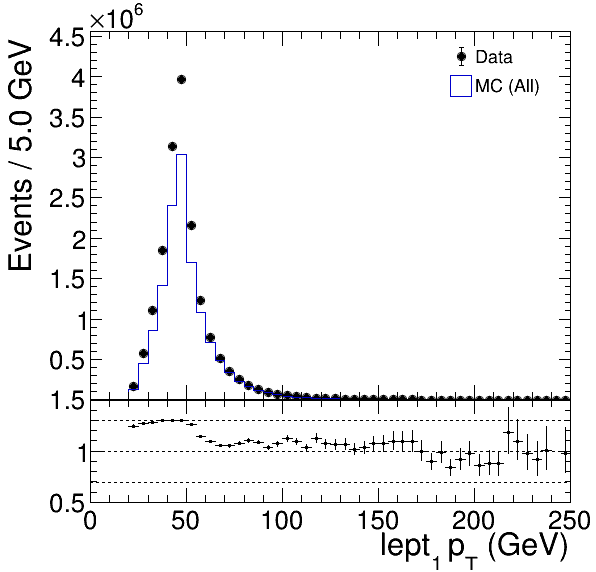

In [90]:
variable = "lept_pt1"
units = "GeV"
title_x = "lept_{1} p_{T}"
title_y = ""
lower_graph_min_y = 0.5
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file lept_pt2.pdf has been created


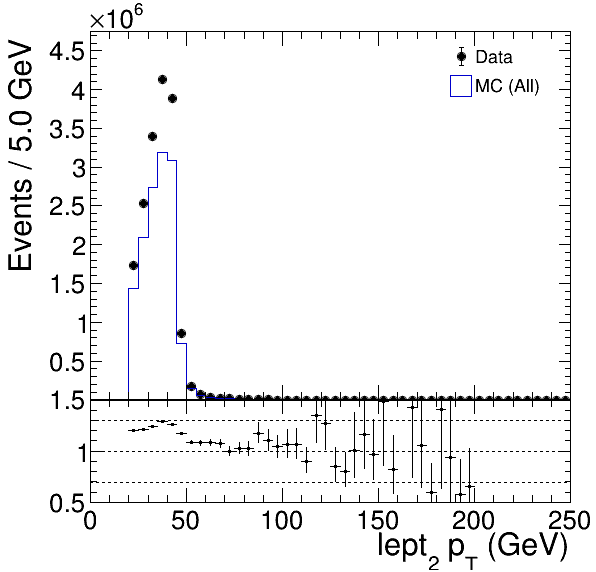

In [91]:
variable = "lept_pt2"
units = "GeV"
title_x = "lept_{2} p_{T}"
title_y = ""
lower_graph_min_y = 0.5
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file Z_pt.pdf has been created


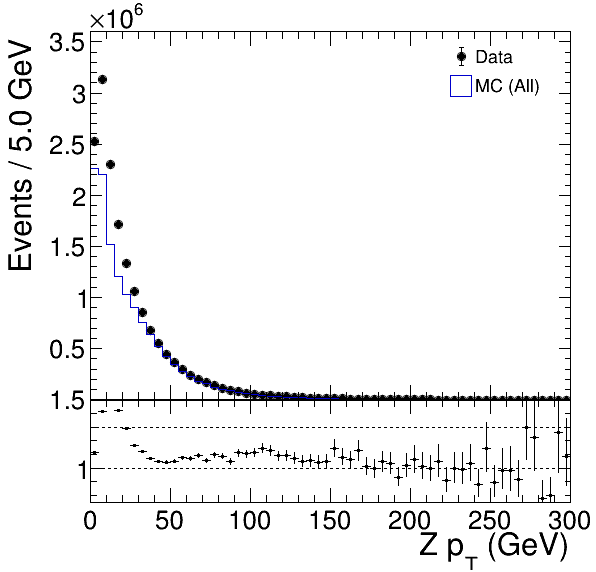

In [92]:
variable = "Z_pt"
units = "GeV"
title_x = "Z p_{T}"
title_y = ""
lower_graph_min_y = 0.75
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file jet_pt.pdf has been created


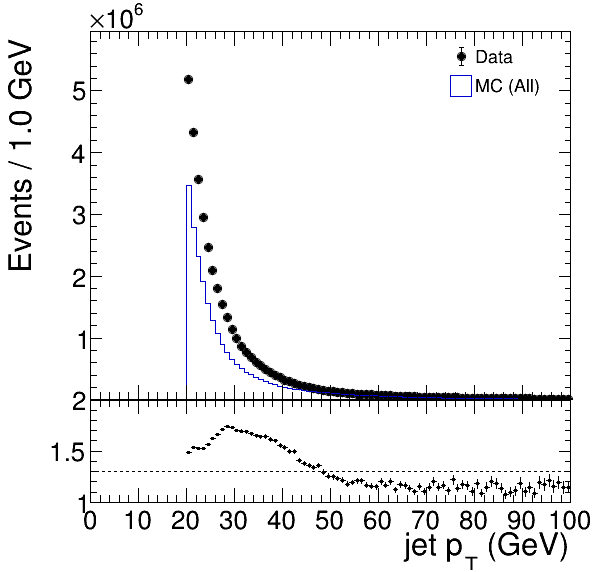

In [93]:
variable = "jet_pt"
units = "GeV"
title_x = "jet p_{T}"
title_y = ""
lower_graph_max_y = 2.0
lower_graph_min_y = 1.0
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file jet_eta.pdf has been created


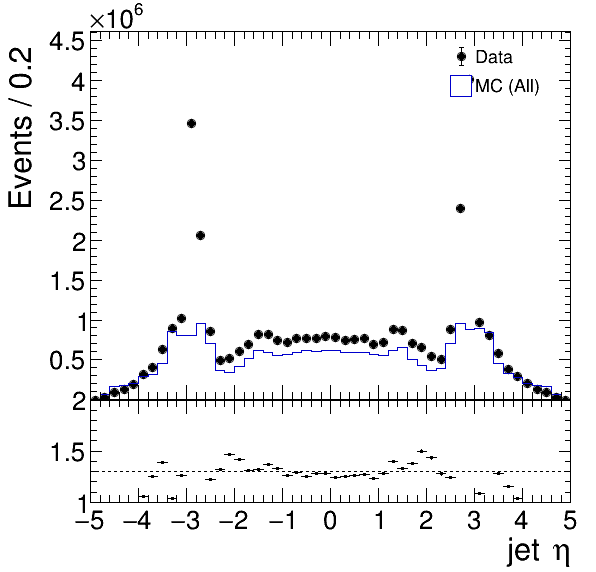

In [94]:
variable = "jet_eta"
units = ""
title_x = "jet #eta"
title_y = ""
lower_graph_max_y = 2.0
lower_graph_min_y = 1.0
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file dphi_zj.pdf has been created


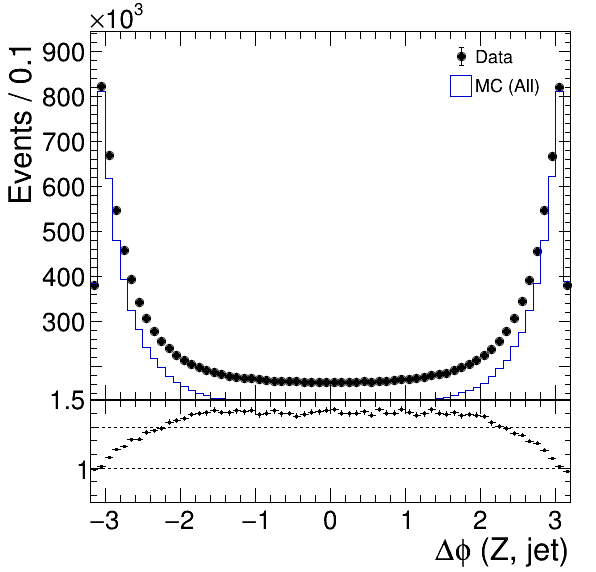

In [95]:
variable = "dphi_zj"
units = ""
title_x = "#Delta#phi (Z, jet)"
title_y = ""
lower_graph_max_y = 1.5
lower_graph_min_y = 0.75
exec(plot_mc_data)